In [1]:
import numpy as np
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pyemma
import msmbuilder
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dtrajs = np.load('100.npy', encoding='bytes')
dtrajs = list(dtrajs)

In [3]:
len(dtrajs)

5019

In [6]:
its = pyemma.msm.its(dtrajs)

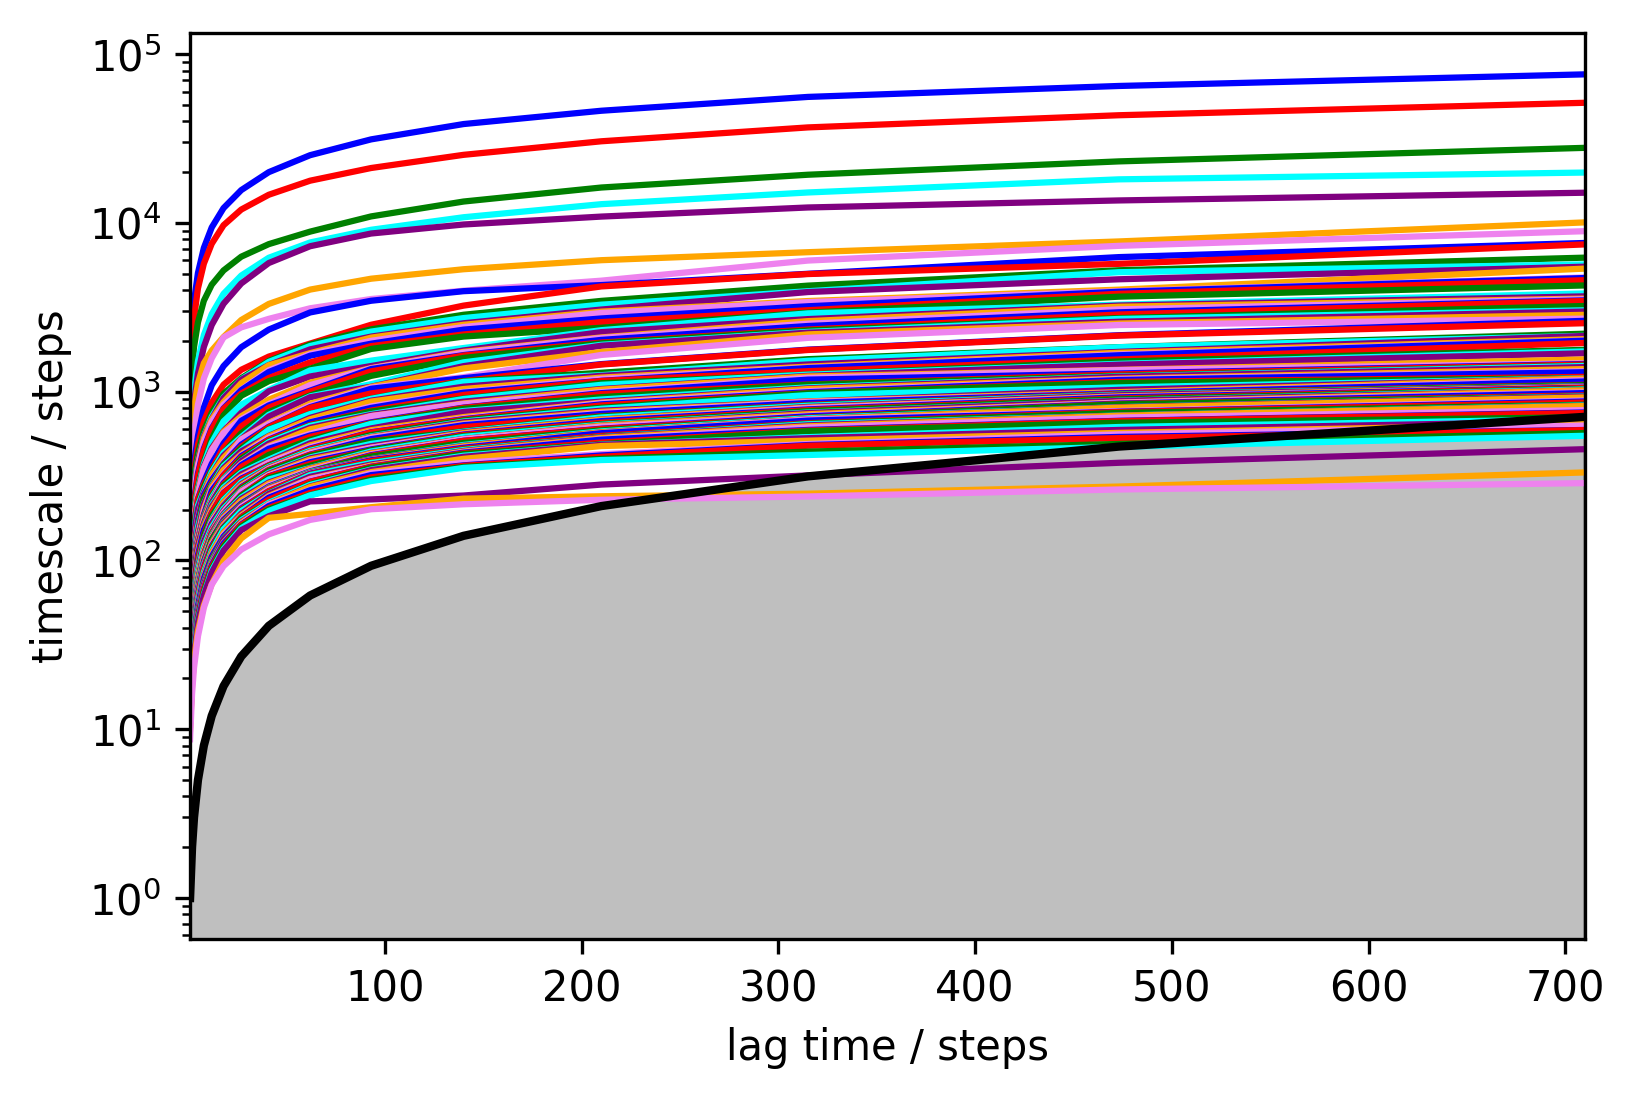

In [17]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)
plt.savefig('dih_100_its_log.png', dpi=300)
plt.show()

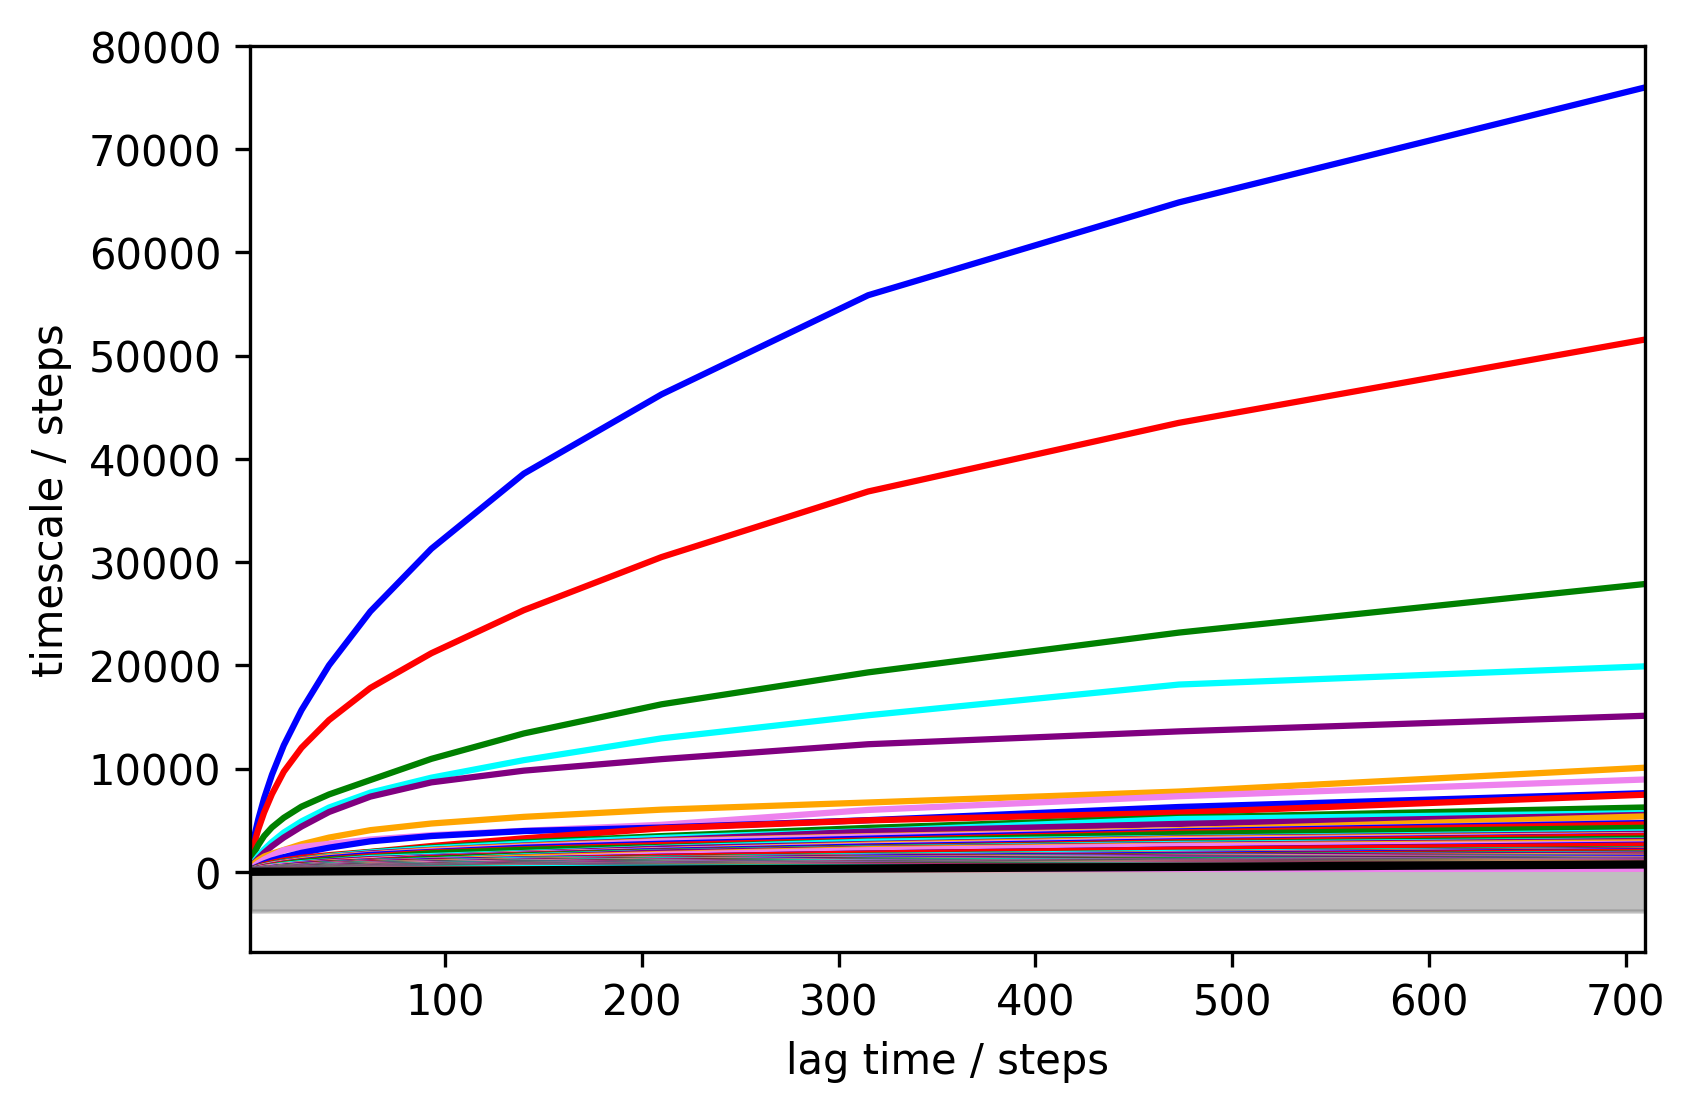

In [18]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False)
plt.savefig('dih_100_its_lin.png', dpi=300)
plt.show()

In [4]:
msm = MarkovStateModel(lag_time=100)
msm.fit(dtrajs)

MSM contains 2 strongly connected components above weight=0.01. Component 1 selected, with population 99.980130%


MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=None,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

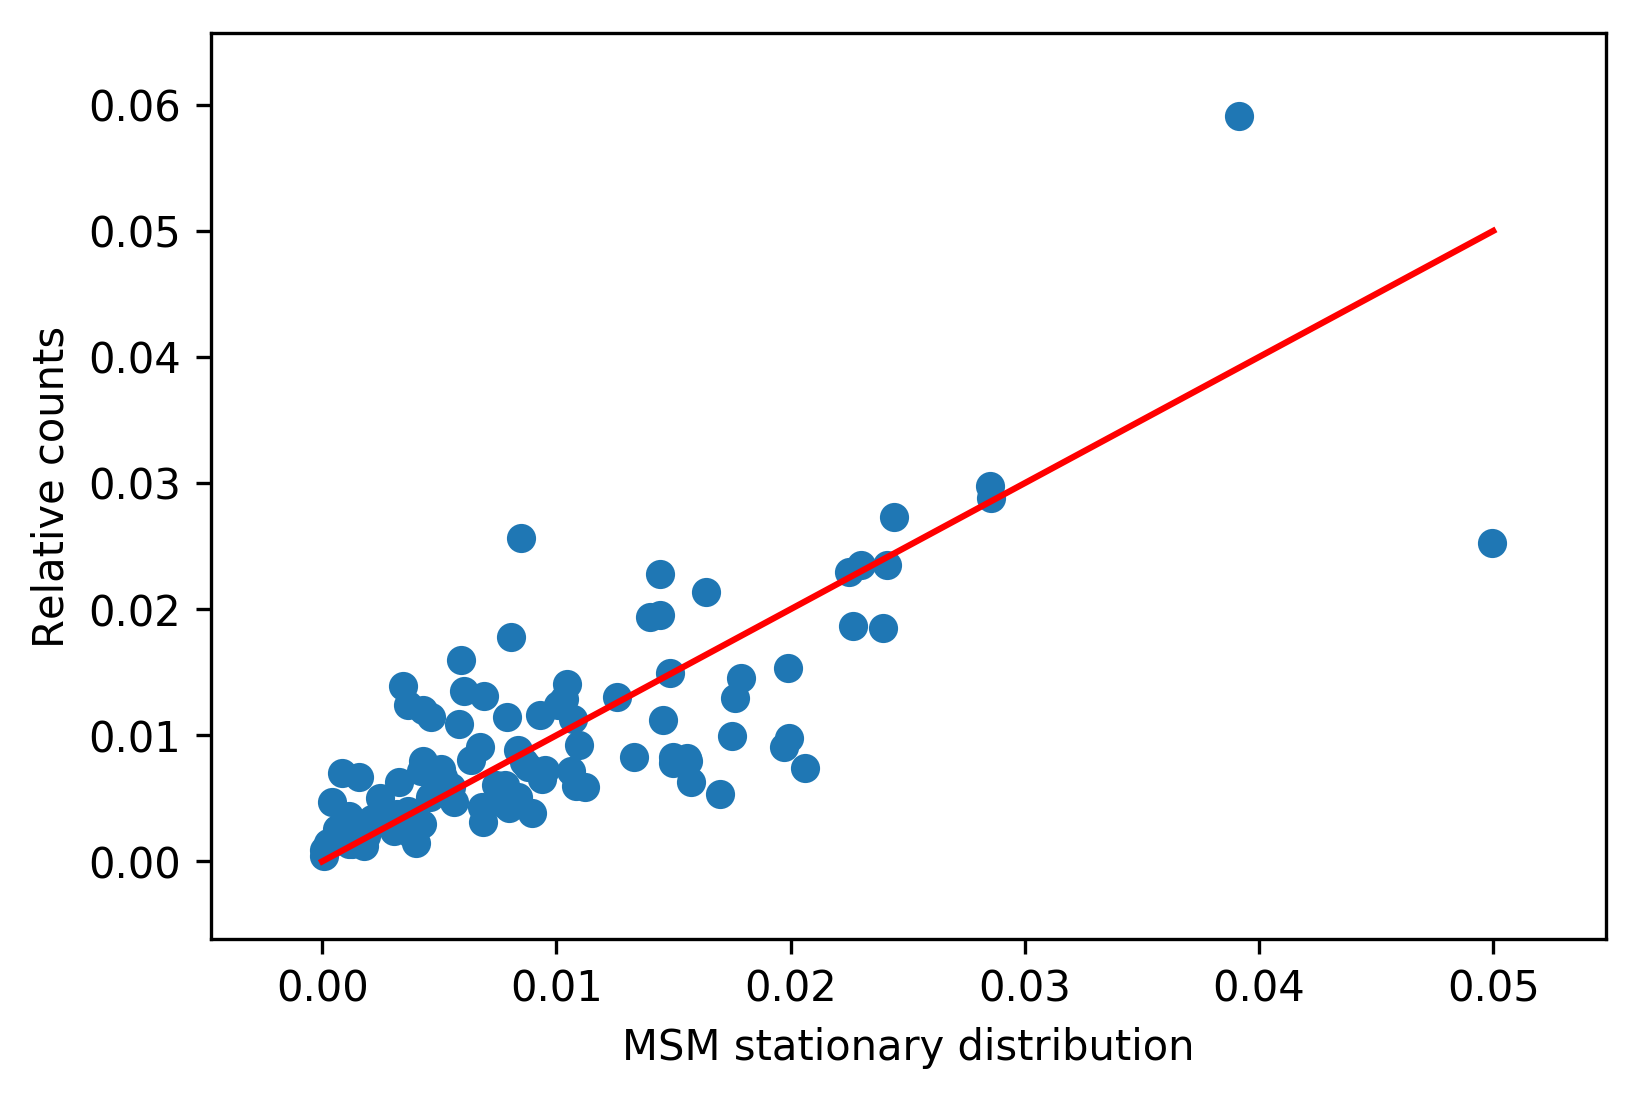

In [54]:
project = 'dih_100'

statdist = msm.populations_
relative_counts = msm.countsmat_.sum(0) / np.sum(msm.countsmat_)

plt.figure(dpi=300)
plt.scatter(statdist, relative_counts)
plt.xlabel('MSM stationary distribution')
plt.ylabel('Relative counts')
plt.plot(np.arange(0, 0.06, 0.01), np.arange(0, 0.06, 0.01), c='red')
plt.savefig('sanity_check_%s.png' %project, dpi=300)
plt.show()

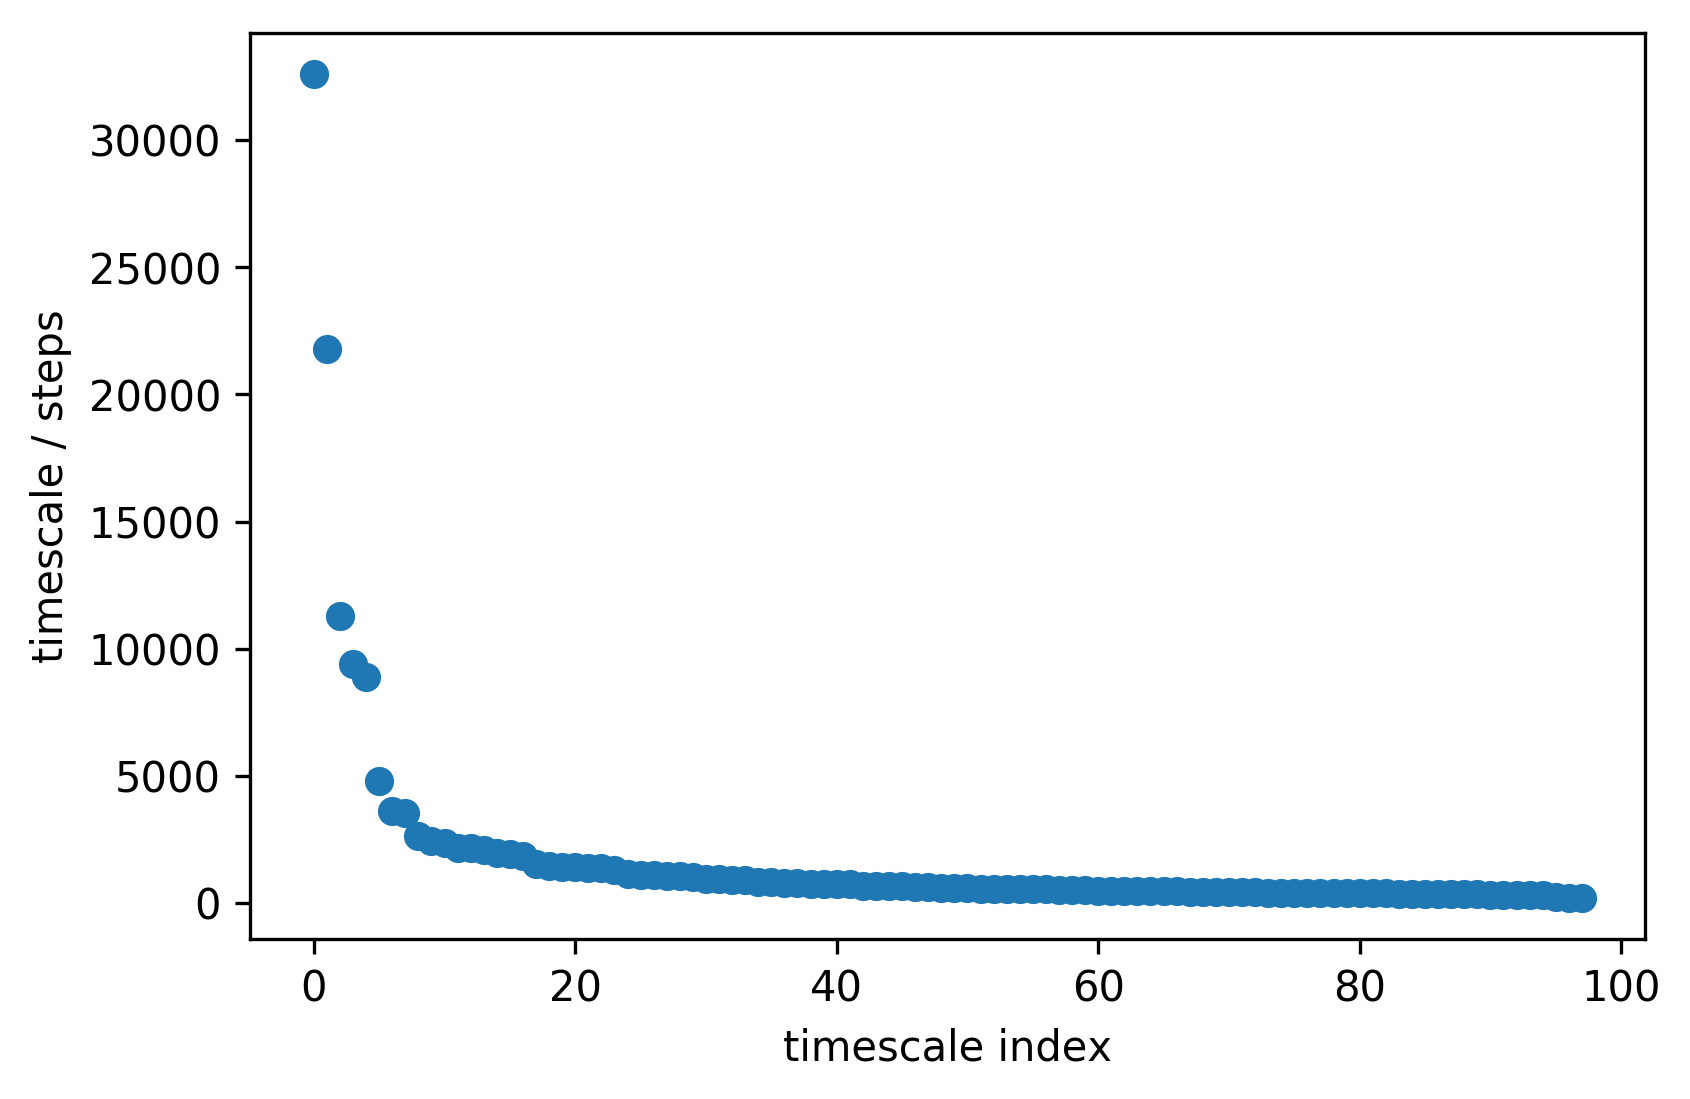

In [45]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.timescales_)), msm.timescales_)
plt.xlabel('timescale index')
plt.ylabel('timescale / steps')
plt.savefig('dih_100_msm_timescales.png', dpi=300)
plt.show()

In [55]:
timescale_gaps = []

for i in range(len(msm.timescales_)-1):
    timescale_gaps.append(msm.timescales_[i] / msm.timescales_[i+1])

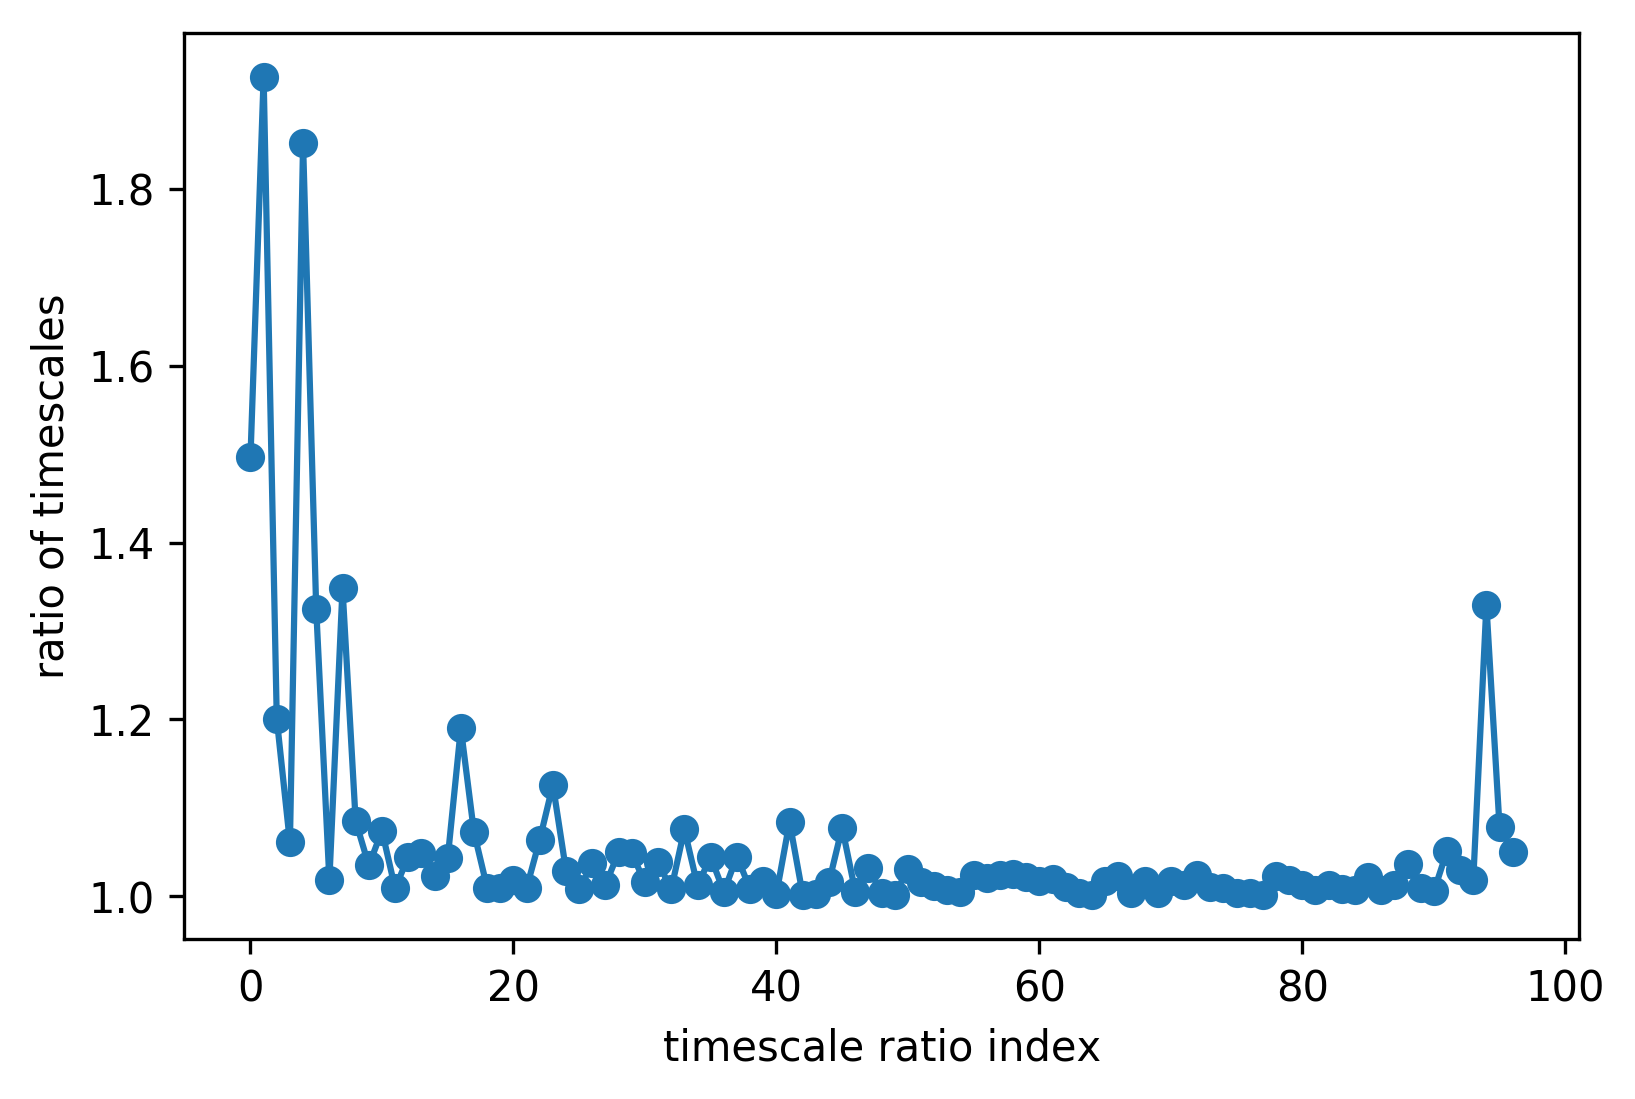

In [67]:
plt.figure(dpi=300)
plt.plot(range(len(timescale_gaps)), timescale_gaps)
plt.scatter(range(len(timescale_gaps)), timescale_gaps)
plt.xlabel('timescale ratio index')
plt.ylabel('ratio of timescales')
plt.savefig('dih_100_msm_timescales_ratios.png', dpi=300)
plt.show()

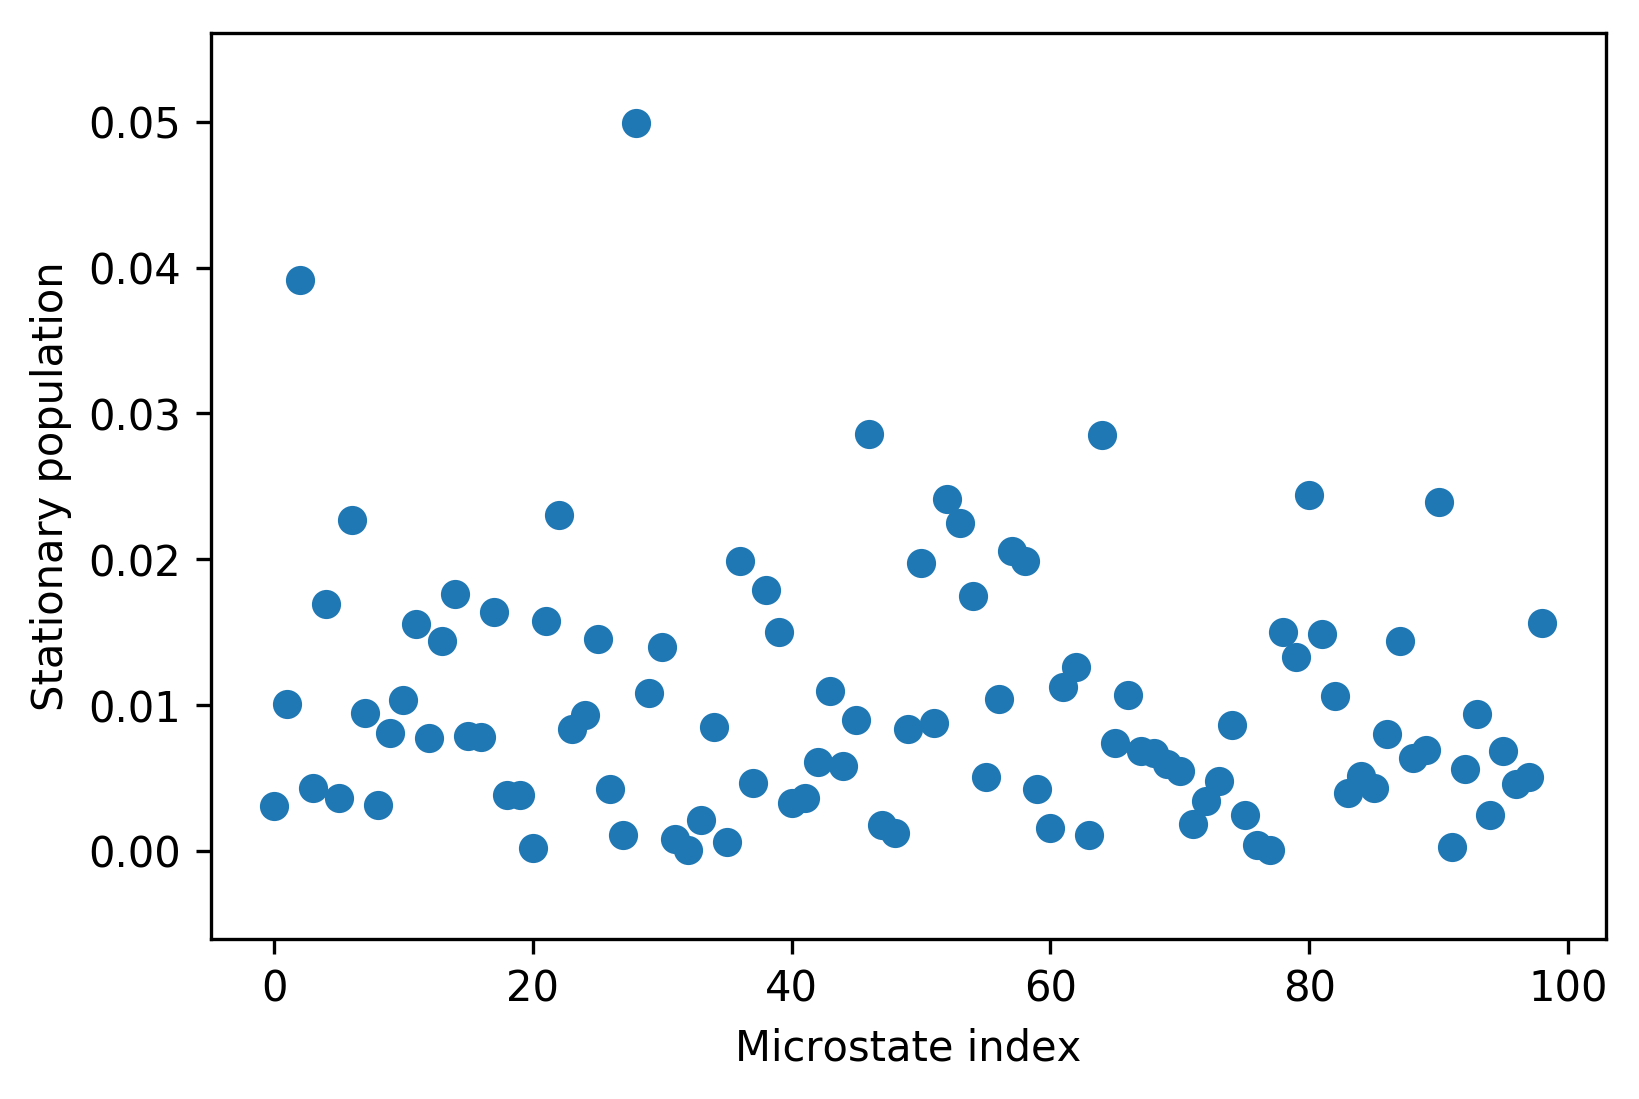

In [25]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.populations_)), msm.populations_)
plt.xlabel('Microstate index')
plt.ylabel('Stationary population')
plt.savefig('dih_100_msm_populations.png', dpi=300)
plt.show()

In [32]:
msm.populations_

array([  3.06675329e-03,   1.00651225e-02,   3.91416717e-02,
         4.32279070e-03,   1.69726644e-02,   3.65533272e-03,
         2.26734388e-02,   9.49910403e-03,   3.17723706e-03,
         8.07786876e-03,   1.03335601e-02,   1.55799032e-02,
         7.78108114e-03,   1.44094981e-02,   1.76121237e-02,
         7.87486256e-03,   7.80897860e-03,   1.63801593e-02,
         3.81683234e-03,   3.87468399e-03,   2.01389906e-04,
         1.57506376e-02,   2.30181586e-02,   8.36399017e-03,
         9.30960164e-03,   1.45332980e-02,   4.26685605e-03,
         1.12931015e-03,   4.99407688e-02,   1.08457872e-02,
         1.40111591e-02,   8.55754163e-04,   9.46819042e-05,
         2.14298120e-03,   8.50756491e-03,   6.23020914e-04,
         1.99051010e-02,   4.66565345e-03,   1.78936719e-02,
         1.49956372e-02,   3.27259362e-03,   3.66040254e-03,
         6.07333302e-03,   1.09805496e-02,   5.84707617e-03,
         8.97499962e-03,   2.85622444e-02,   1.79791563e-03,
         1.25348127e-03,

In [4]:
pyemma_msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [6]:
pyemma_pcca = pyemma_msm.pcca(6)

In [7]:
pyemma_msm.metastable_sets

[array([ 5, 17, 40, 69, 82]),
 array([ 1, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [26]:
# calculate and plot populations of macrostates

In [30]:
macrostate_populations = []

for macrostate in pyemma_msm.metastable_sets:
    population = 0
    for microstate in macrostate:
        population += pyemma_msm.stationary_distribution[microstate]
    macrostate_populations.append(population)    

In [31]:
macrostate_populations

[0.039889952571695253,
 0.069521363851226411,
 0.11336361426700339,
 0.32357427460008709,
 0.20311382559100111,
 0.2505369691189866]

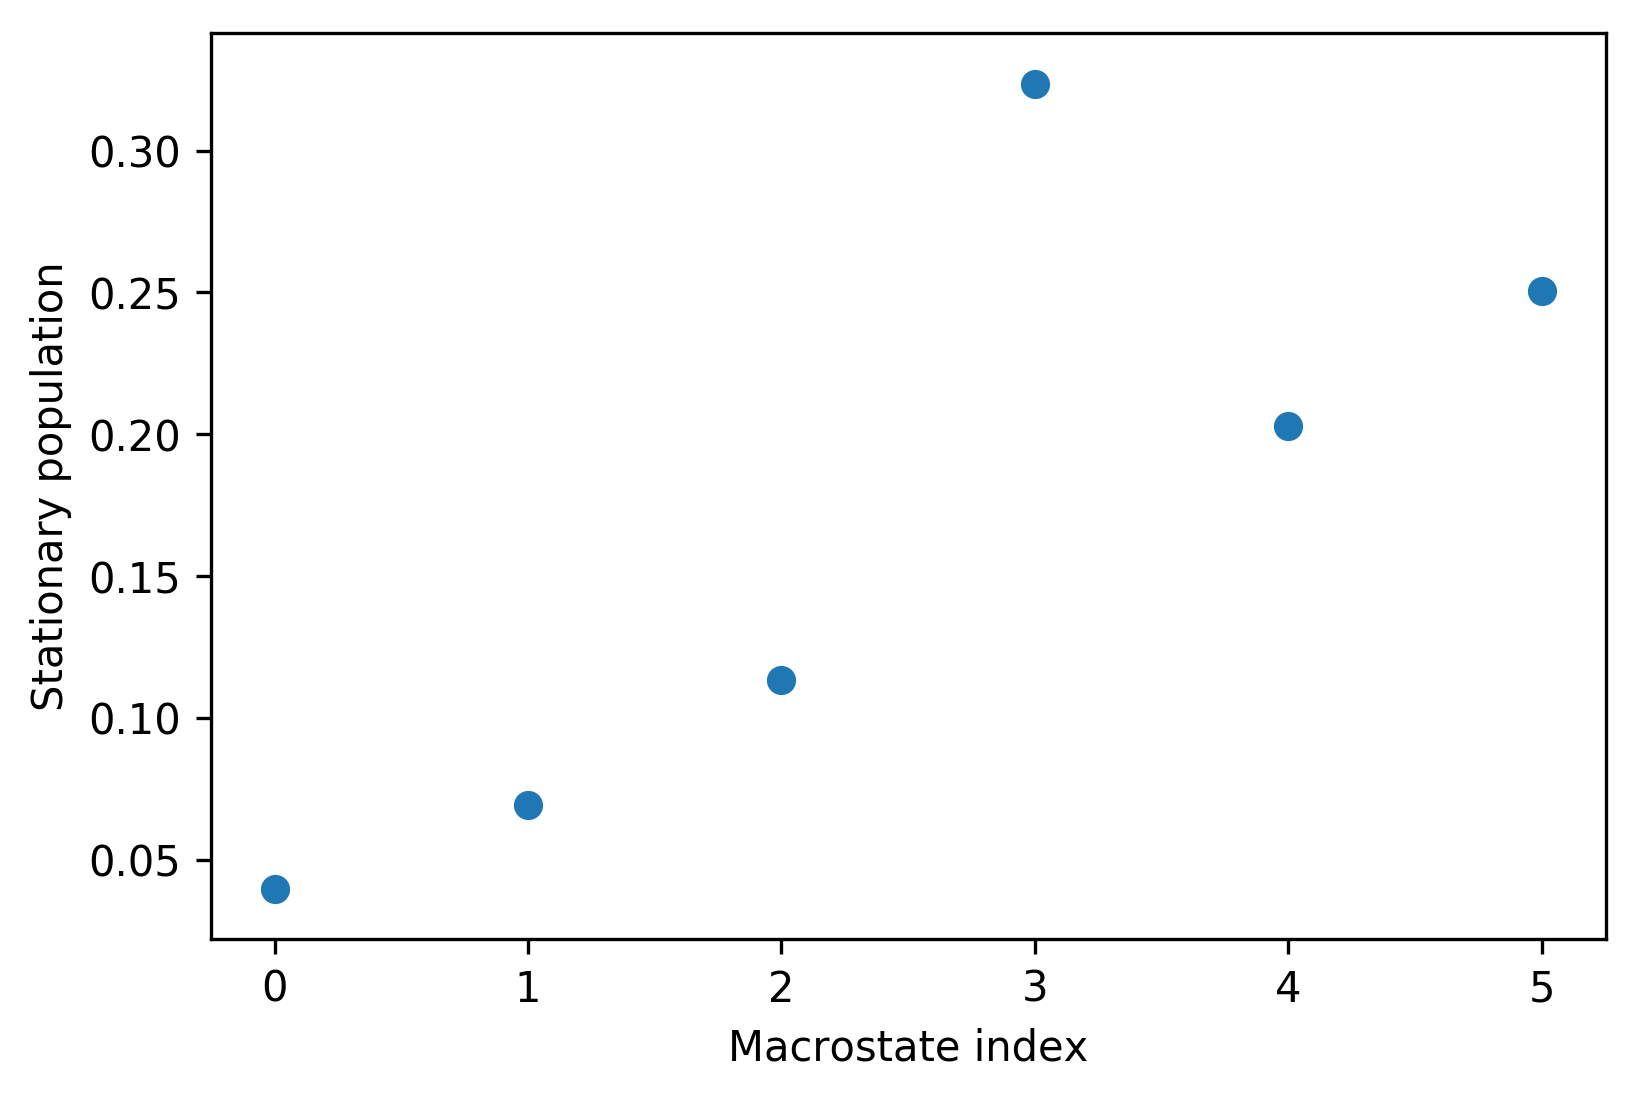

In [33]:
plt.figure(dpi=300)
plt.scatter(range(len(macrostate_populations)), macrostate_populations)
plt.xlabel('Macrostate index')
plt.ylabel('Stationary population')
plt.savefig('dih_100_msm_pcca6_macrostate_populations.png', dpi=300)
plt.show()

In [92]:
# plot the transition matrix

In [97]:
pyemma_msm.transition_matrix.shape

(99, 99)

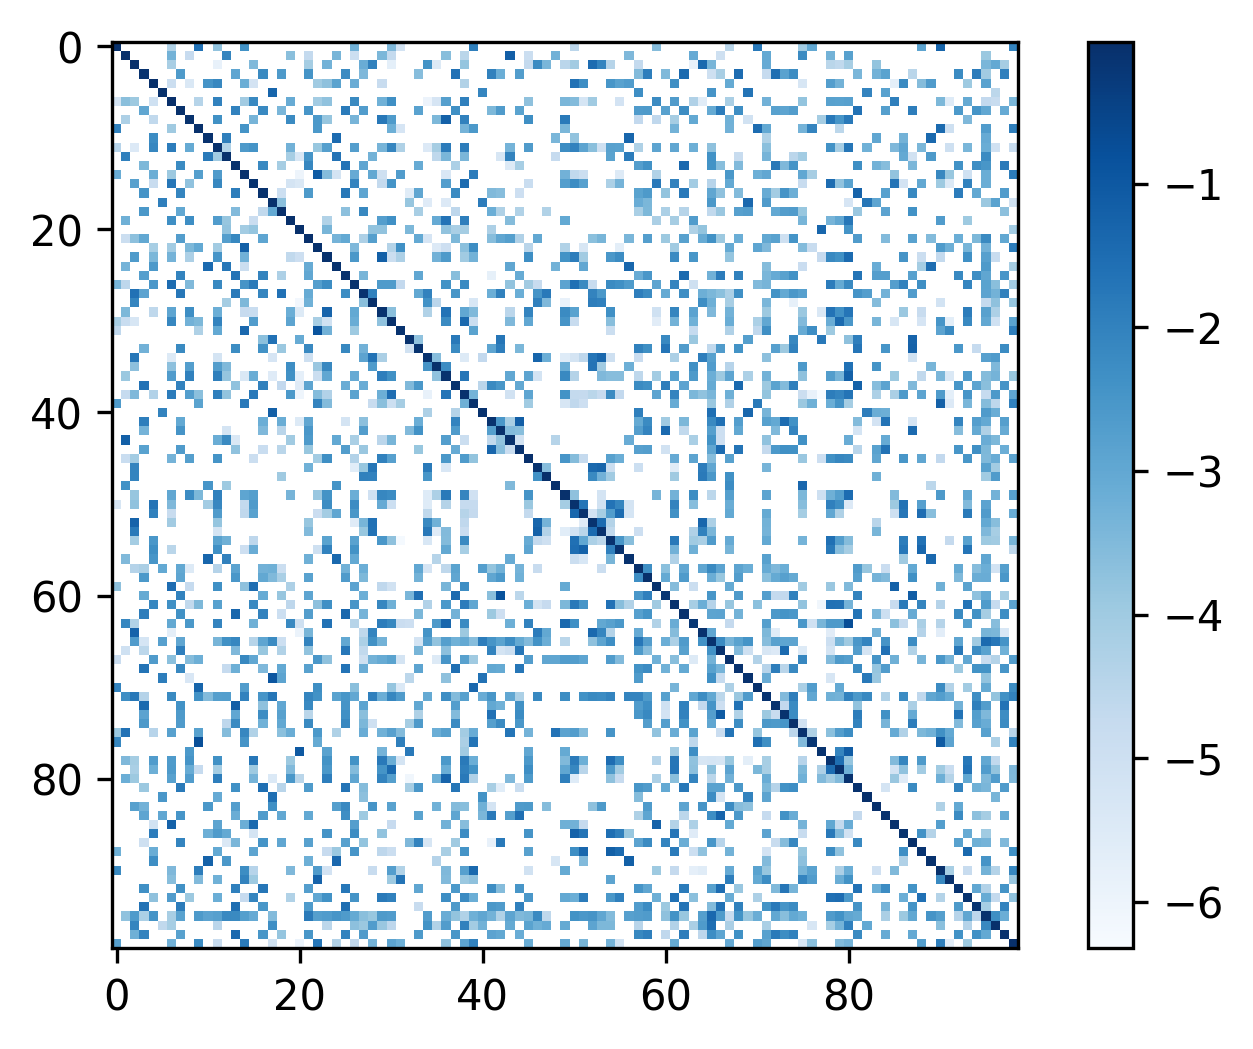

In [96]:
plt.figure(dpi=300)
plt.imshow(np.log10(pyemma_msm.transition_matrix), cmap='Blues')
plt.colorbar()

In [98]:
# now make a new transition matrix - which has the state labels changed so that microstate in one PCCA macrostate are 
# together

In [45]:
tm = np.zeros((99,99))

In [46]:
pyemma_msm.metastable_sets

[array([ 5, 17, 40, 69, 82]),
 array([ 1, 10, 12, 24, 43, 48, 56, 75, 89]),
 array([ 0,  9, 14, 22, 31, 39, 70, 76, 90, 91, 98]),
 array([ 4,  6,  8, 11, 15, 19, 20, 23, 26, 29, 30, 35, 36, 38, 45, 49, 50,
        51, 54, 55, 59, 61, 63, 67, 77, 78, 79, 80, 85, 86, 88, 93, 96]),
 array([ 2, 28, 34, 46, 47, 52, 53, 64]),
 array([ 3,  7, 13, 16, 18, 21, 25, 27, 32, 33, 37, 41, 42, 44, 57, 58, 60,
        62, 65, 66, 68, 71, 72, 73, 74, 81, 83, 84, 87, 92, 94, 95, 97])]

In [47]:
new_old_dict = dict()

i = 0
for macrostate in pyemma_msm.metastable_sets:
    for microstate in macrostate:
        new_old_dict[i] = microstate
        i += 1

In [48]:
for i in range(99):
    for j in range(99):
        tm[i,j] = pyemma_msm.transition_matrix[new_old_dict[i], new_old_dict[j]]

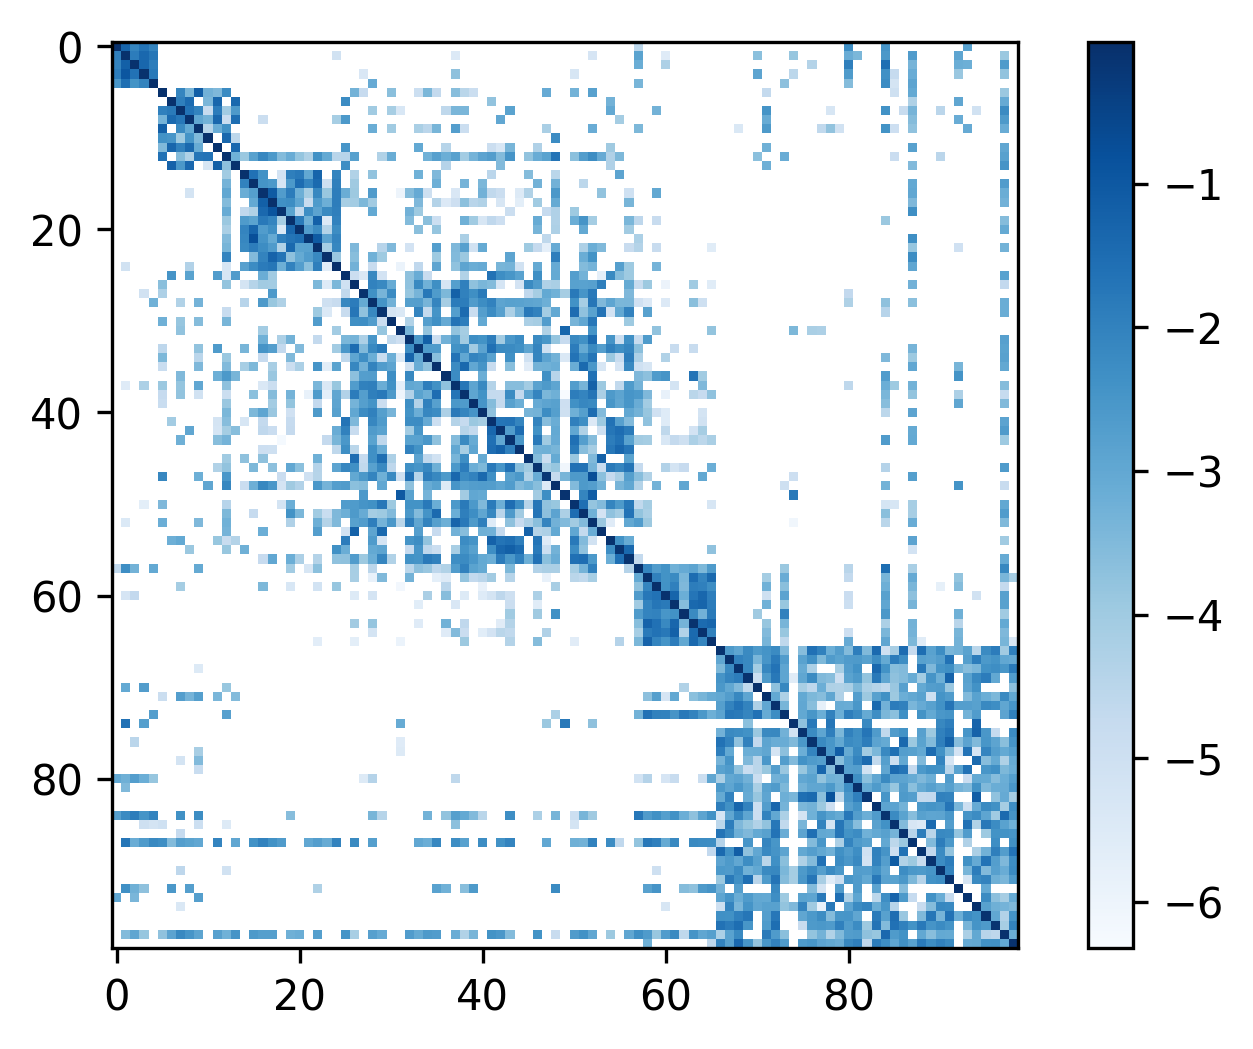

In [50]:
plt.figure(dpi=300)
plt.imshow(np.log10(tm), cmap='Blues')
plt.colorbar()
plt.savefig('dih_100_transmat_reshuffled_by_pcca6.png', dpi=300)
plt.show()

In [ ]:
# ck test

In [56]:
ck_test = pyemma_msm.cktest(6, mlags=None)

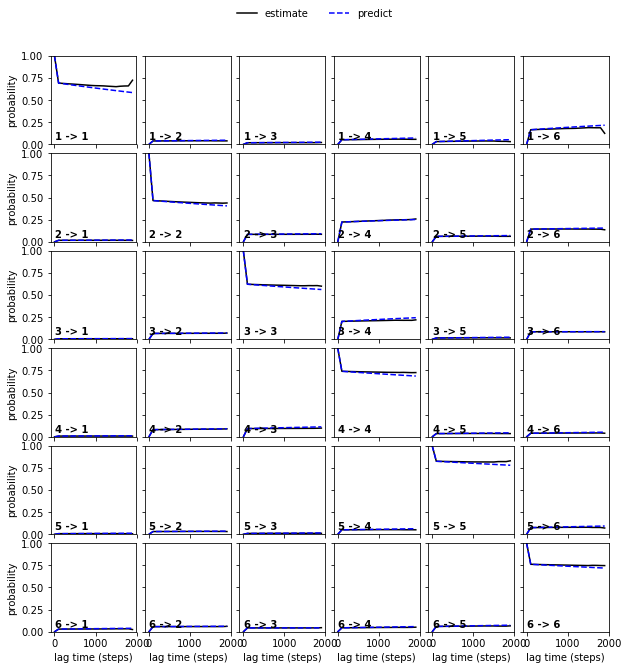

In [59]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(ck_test)
plt.savefig('dih_100_cktest.png', dpi=300)
plt.show()

In [62]:
# now do everything bayesian (implied timescales and ck test)

In [70]:
#its = pyemma.msm.its(dtrajs, errors='bayes', nsamples=2)

In [71]:
#plt.figure(dpi=300)
#pyemma.plots.plot_implied_timescales(its)
#plt.savefig('dih_100_its_log_bayes.png', dpi=300)
#plt.show()

In [72]:
#plt.figure(dpi=300)
#pyemma.plots.plot_implied_timescales(its, ylog=False)
#plt.savefig('dih_100_its_lin_bayes.png', dpi=300)
#plt.show()

In [76]:
#pyemma_msm_bayes = pyemma.msm.estimate_markov_model(dtrajs, lag=100, count_mode='effective')

In [77]:
#ck_test_bayes = pyemma_msm_bayes.cktest(6, mlags=None)

In [78]:
#plt.figure(dpi=300)
#pyemma.plots.plot_cktest(ck_test_bayes)
#plt.savefig('dih_100_cktest_bayes.png', dpi=300)
#plt.show()

In [63]:
##############################
# 1) plot cluster centers on TICA landscapes
# 2) 1) + color cluster centers by macrostate
# 3) show MSM populations - pyemma.plots.scatter_contour?

In [22]:
import glob
import numpy as np
import msmexplorer
import itertools

In [8]:
tica_trajs = glob.glob('../tica/10_tics_trajs/*.npy')

In [9]:
tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [10]:
tica_proj_concat.shape

(9862657, 10)

In [11]:
cluster_centers = np.load('cluster_centers/100.npy')

In [90]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')
    plt.savefig('landscapes_hist/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [91]:
# color by macrostate

In [12]:
set(range(100)) - set(pyemma_msm.active_set)

{69}

In [13]:
cluster_centers_ = cluster_centers[pyemma_msm.active_set]

In [14]:
cluster_centers_.shape

(99, 467)

In [51]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()
    plt.savefig('landscapes_hist_by_macrostate/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [144]:
# to show MSM populations - try msmexplorer plotting, passing the pi parameter

In [150]:
# 1) load TICA trajectories in the same order as dtrajs are (have glob used in kmeans from HAL)
# 2) state 69 is not in active set - we're gonna make a new populations array, with 0 for 69

In [151]:
#kmeans_glob = np.load('../kmeans_glob.npy')

In [154]:
#kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]

In [156]:
#tica_trajs = ['../tica/10_tics_trajs/' + x for x in kmeans_glob_trajs]

In [158]:
#tica_proj = []

#for traj in tica_trajs:
#    tica_proj.append(np.load(traj))
    
#tica_proj_concat = np.concatenate(tica_proj)    

In [166]:
#microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])

In [15]:
#microstate_populations[69]

In [16]:
#len(microstate_populations)

In [17]:
#pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]

In [18]:
#pi_0.shape

In [192]:
#i=0
#j=1

#plot_data = msmexplorer.plot_free_energy(tica_proj_concat[::10], obs=(i,j), cbar=True, return_data=True, pi=pi_0[::10])
#plt.close()

#fig = plt.figure(dpi=300)
#ax = fig.add_subplot(1,1,1)
#ax.grid(False)
#ax.set_xlabel('tIC0')
#ax.set_ylabel('tIC1')
#vmin = -1E-12
#vmax = np.percentile(plot_data[1][2], 50)
#n_levels = 20
#alpha = 0.5
#im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
#                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
#                             zorder=1, vmin=vmin, vmax=vmax)
#cbar = plt.colorbar(im)
#cbar.ax.set_ylabel('Free energy (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
#plt.show()

In [193]:
# didn't work - let's try PyEMMA

In [19]:
#cluster_centers_.shape

In [20]:
#pyemma_msm.stationary_distribution.shape

In [200]:
#plt.figure(dpi=300)
#pyemma.plots.scatter_contour(cluster_centers_[:,0], cluster_centers_[:,1], pyemma_msm.stationary_distribution)
#plt.show()

In [ ]:
# also not great - let's just plot the cluster centers on the landscapes, colored by population
# then the same colored by population of macrostate

In [24]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    plt.savefig('landscapes_hist_by_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [34]:
# now by macrostate

In [35]:
macrostate_populations

[0.039889952571695253,
 0.069521363851226411,
 0.11336361426700339,
 0.32357427460008709,
 0.20311382559100111,
 0.2505369691189866]

In [40]:
macrostate_populations_ = []

for microstate in range(len(pyemma_msm.stationary_distribution)):
    macrostate_populations_.append(macrostate_populations[pyemma_msm.metastable_assignments[microstate]])

In [42]:
len(macrostate_populations_)

99

In [43]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:
    
    plt.figure(dpi=300)
    plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=[1/len(tica_proj_concat[:,i])]*len(tica_proj_concat[:,i]))
    plt.xlabel('tIC%d' % i)
    plt.ylabel('tIC%d' % j)
    plt.colorbar()
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    plt.savefig('landscapes_hist_by_macrostate_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [ ]:
# ok those last ones (colored by macrostate population) I'm happy with!!

In [68]:
# now do all these plots but on the 'free energy' landscapes - 
# we're gonna change the label from free energy to '-ln(sampling ratio) * kT`
# and we're gonna save the results for easier re-plotting

In [70]:
import msmexplorer

In [ ]:
#combinations = itertools.combinations(range(10),2)
combinations = list(itertools.combinations(range(10),2))[15:]
for i,j in combinations:
    
    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
    np.save('landscapes_plot_data/tics_%d_%d.npy' % (i,j), plot_data)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    for center in cluster_centers:
        plt.scatter(center[i], center[j], marker='.', c='red')

    plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.metastable_assignments, cmap=matplotlib.cm.get_cmap('gist_rainbow', 6))
    plt.colorbar()
    
    plt.savefig('landscapes_by_macrostate/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=pyemma_msm.stationary_distribution, cmap='Reds')
    plt.colorbar()
    
    plt.savefig('landscapes_by_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('-ln(sampling ratio) * kT (kcal/mol)')
    
    plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
    plt.colorbar()
    
    plt.savefig('landscapes_by_macrostate_population/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
# also made pcca7 and pcca9 but overwrote another copy of this notebook with this one and that code was lost...

In [5]:
# now going back to the 'corrected landscape' - we're gonna try the hist2d, with appropriate weights

In [7]:
kmeans_glob = np.load('../kmeans_glob.npy')

In [8]:
kmeans_glob_trajs = [x.split('/')[1] for x in kmeans_glob]

In [9]:
tica_trajs = ['../tica/10_tics_trajs/' + x for x in kmeans_glob_trajs]

In [10]:
tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [11]:
microstate_populations = list(pyemma_msm.stationary_distribution[:69]) + [0] + list(pyemma_msm.stationary_distribution[69:])

In [34]:
pi_0 = np.array(microstate_populations)[np.concatenate(dtrajs, axis=0)]

In [15]:
# determine how many frames in dtrajs are in every microstate - correct by those factors too

In [16]:
len(pi_0)

9862657

In [25]:
microstate_counts = dict()

for i in range(100):
    microstate_counts[i] = 0
    
for dtraj in dtrajs:
    for frame in dtraj:
        microstate_counts[frame] += 1

In [27]:
frame_in_states_populations = []

for i in range(100):
    frame_in_states_populations.append(microstate_counts[i])

In [29]:
frame_in_states_weights = [1/x for x in frame_in_states_populations

In [36]:
pi_0 = (np.array(microstate_populations)*np.array(frame_in_states_weights))[np.concatenate(dtrajs, axis=0)]

In [37]:
np.sum(pi_0)

0.99999999999999978

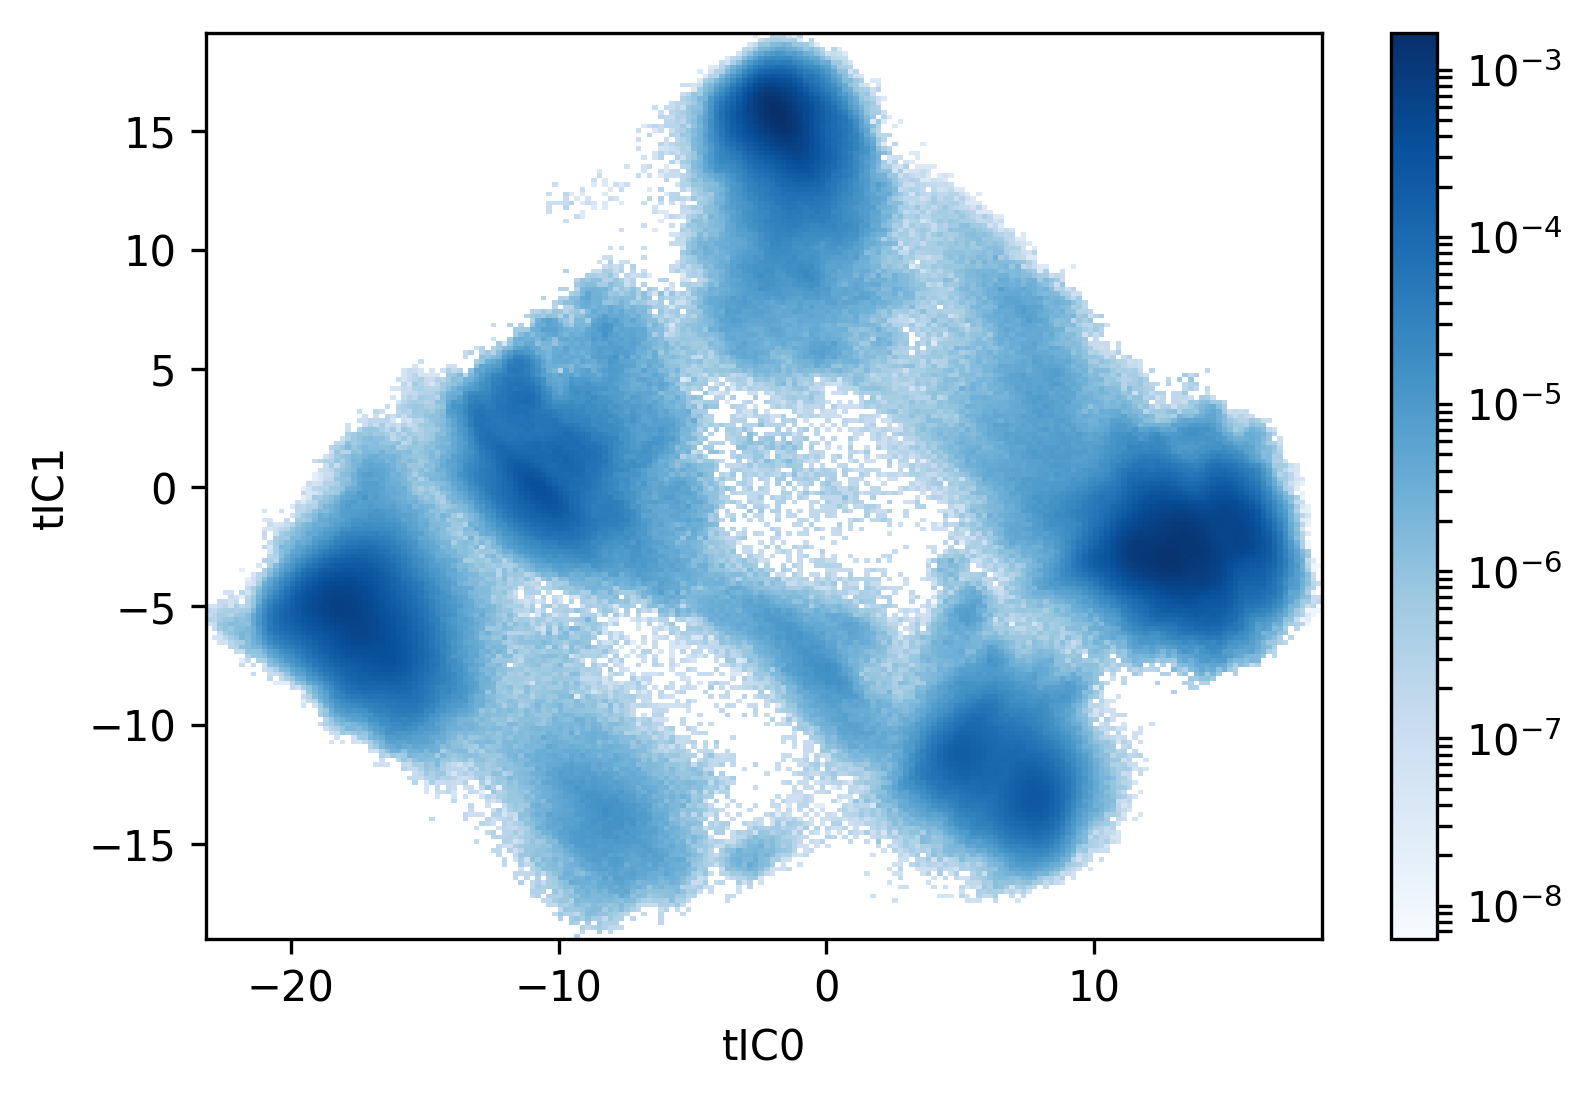

In [43]:
#combinations = itertools.combinations(range(10), 2)

#for i,j in combinations:

i=0
j=1
    
plt.figure(dpi=300)
plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
plt.xlabel('tIC%d' % i)
plt.ylabel('tIC%d' % j)
plt.colorbar()
#plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
#plt.colorbar()
#plt.savefig('landscapes_hist_by_macrostate_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
plt.show()

In [44]:
#### test

In [46]:
microstate_populations_test = [0] * 99 + [1]

In [47]:
pi_0 = (np.array(microstate_populations_test)*np.array(frame_in_states_weights))[np.concatenate(dtrajs, axis=0)]

In [56]:
np.sum(pi_0)

1.0000000000000004

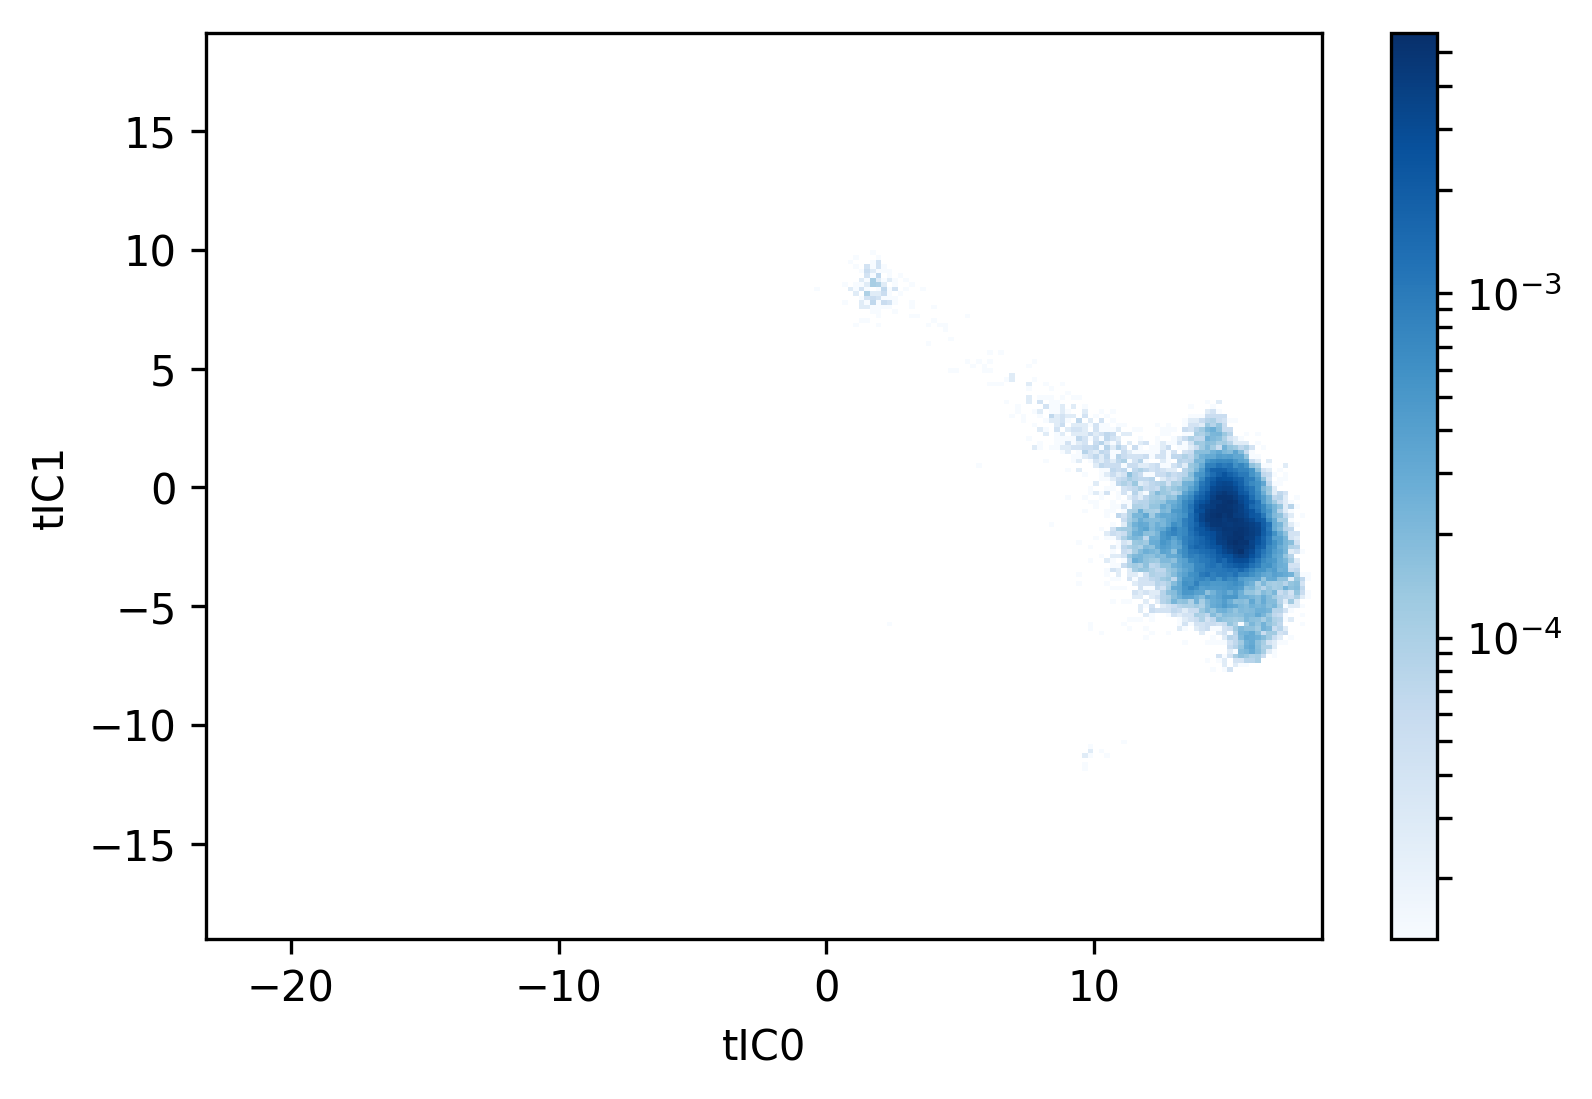

In [57]:
#combinations = itertools.combinations(range(10), 2)

#for i,j in combinations:

i=0
j=1
    
plt.figure(dpi=300)
plt.hist2d(tica_proj_concat[:,i], tica_proj_concat[:,j], cmap='Blues', bins=200, norm=matplotlib.colors.LogNorm(), weights=pi_0)
plt.xlabel('tIC%d' % i)
plt.ylabel('tIC%d' % j)
plt.colorbar()
#plt.scatter(cluster_centers_[:,i], cluster_centers_[:,j], marker='.', c=macrostate_populations_, cmap='Reds')
#plt.colorbar()
#plt.savefig('landscapes_hist_by_macrostate_population/tics_hist_%d_%d.png' % (i,j), dpi=300)
plt.show()